# Kütüphaneleri tanımlayın

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv('income.csv')

In [7]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 48842 Columns: 15


dataset.info()

In [9]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


# Veriyi araştırın

In [10]:
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

In [11]:
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [12]:
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
<=50K    76.07 %
>50K     23.93 %
Name: proportion, dtype: object

# Veri Analizi

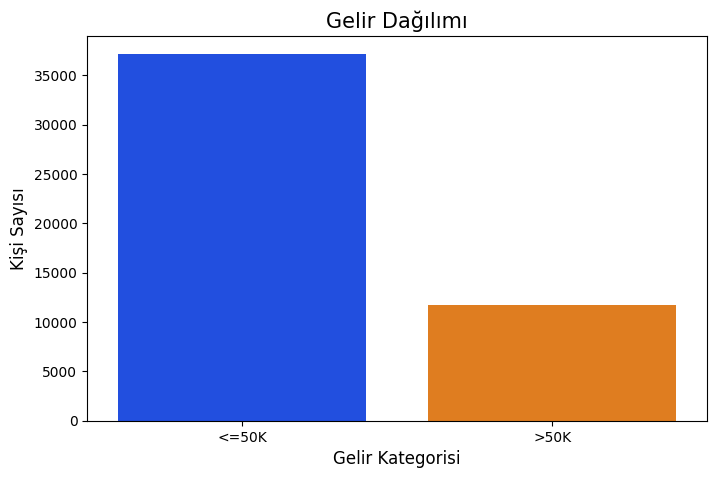

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gelir sütununu oluşturun veya uygun bir şekilde adlandırın (örneğin, 'income')
# Aşağıdaki satırı veri çerçevenize uygun bir şekilde güncelleyin
income_data = dataset['income']

# Gelir kategorilerini ve sayılarını hesaplayın
income_categories = income_data.value_counts()

# Gelir dağılımını gösteren bir çubuk grafiği çizin
plt.figure(figsize=(8, 5))
sns.barplot(x=income_categories.index, y=income_categories.values, palette='bright')
plt.title('Gelir Dağılımı', fontsize=15)
plt.xlabel('Gelir Kategorisi', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.show()



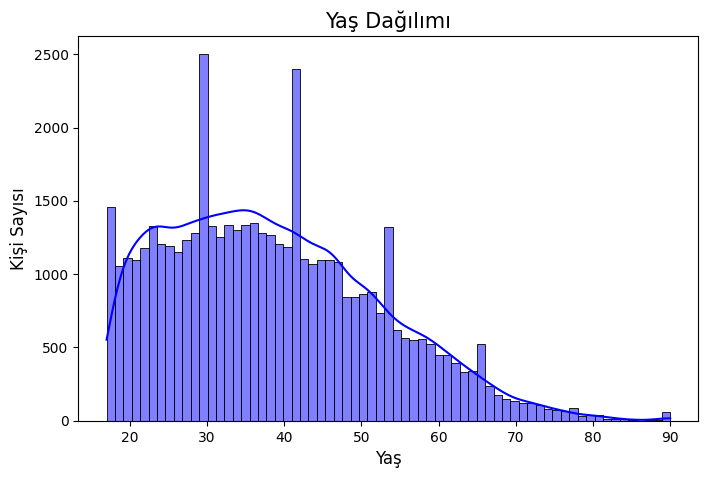

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# "age" değişkeninin dağılım grafiği
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset, x='age', kde=True, color='blue')
plt.title('Yaş Dağılımı', fontsize=15)
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.show()


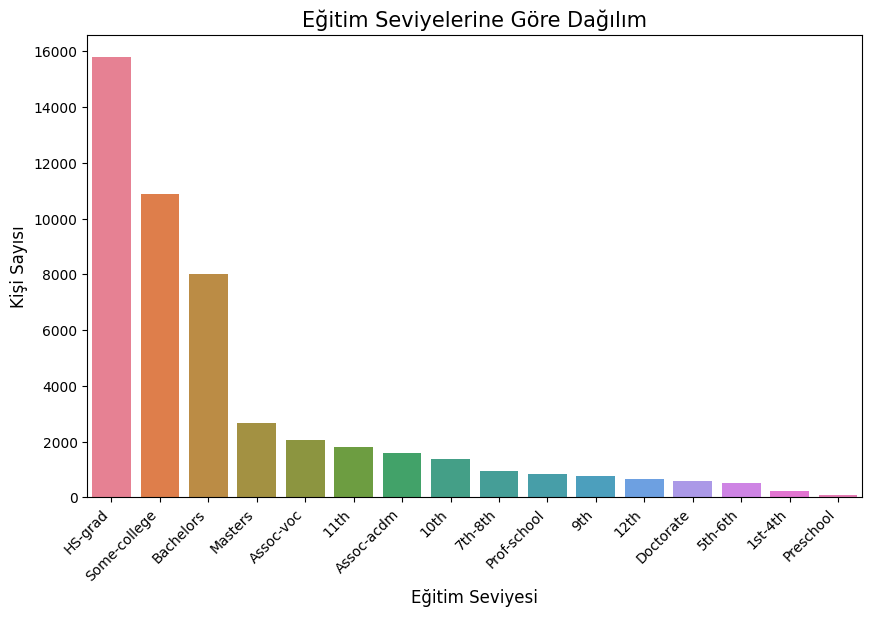

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eğitim seviyelerini ve sayılarını hesaplayın
education_categories = dataset['education'].value_counts()

# Eğitim seviyelerini renklendirin
colors = sns.color_palette('husl', n_colors=len(education_categories))

# Eğitim seviyelerini gösteren bir çubuk grafiği çizin
plt.figure(figsize=(10, 6))
sns.barplot(x=education_categories.index, y=education_categories.values, palette=colors)
plt.title('Eğitim Seviyelerine Göre Dağılım', fontsize=15)
plt.xlabel('Eğitim Seviyesi', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


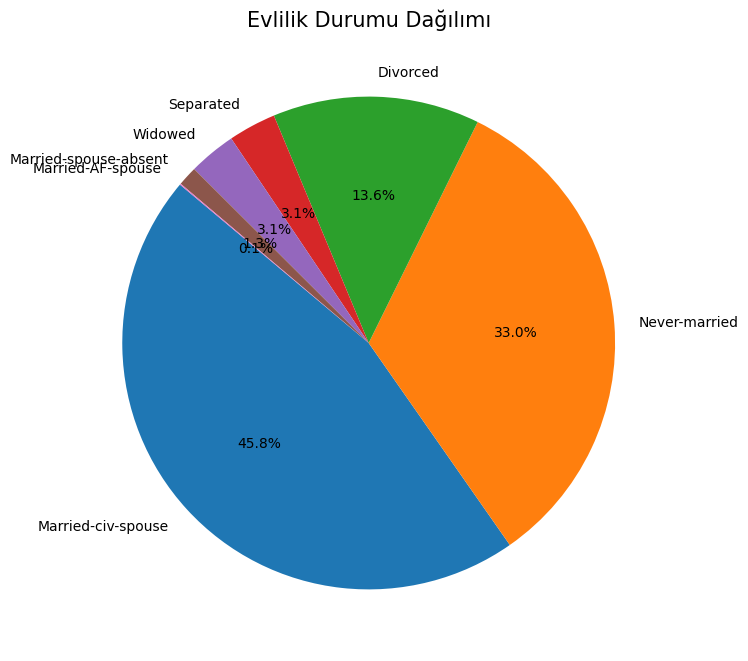

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evlilik durumu kategorilerini ve sayılarını hesaplayın
marital_status_categories = dataset['marital-status'].value_counts()

# Pasta grafiği çizin
plt.figure(figsize=(8, 8))
plt.pie(marital_status_categories, labels=marital_status_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Evlilik Durumu Dağılımı', fontsize=15)
plt.show()


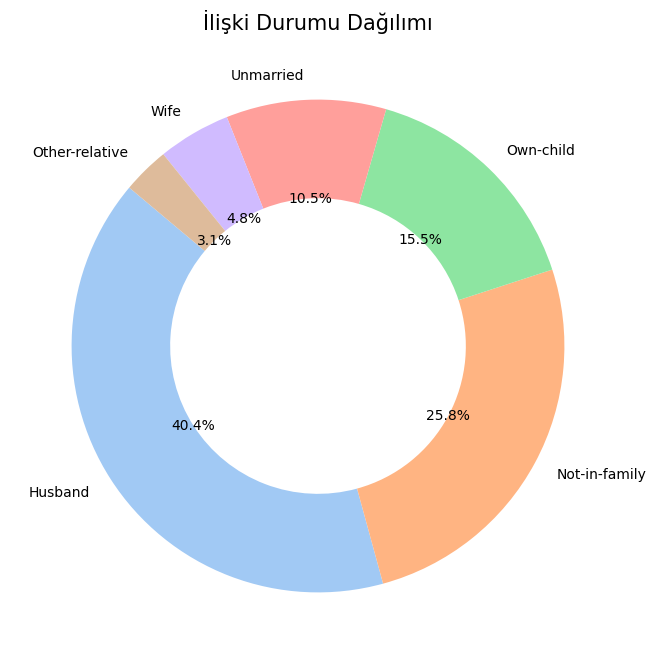

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# relationship sütununun kategorilerini ve sayılarını hesaplayın
relationship_categories = dataset['relationship'].value_counts()

# Grafiği çizmek için verileri hazırlayın
labels = relationship_categories.index
sizes = relationship_categories.values

# Renk paleti
colors = sns.color_palette('pastel')[0:len(labels)]

# Donut grafiği çizin
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title('İlişki Durumu Dağılımı', fontsize=15)
plt.show()


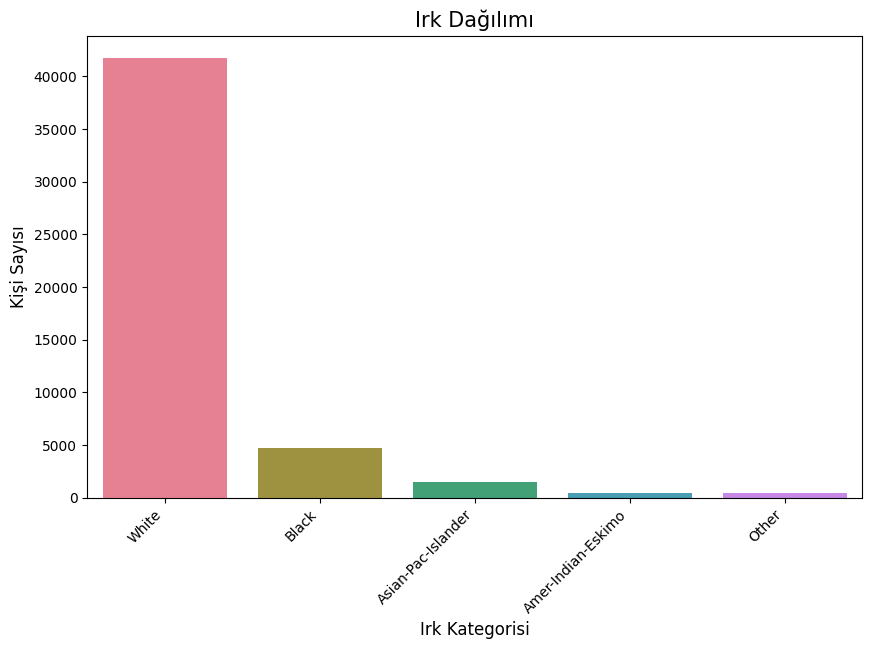

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rırk kategorilerini ve sayılarını hesaplayın
race_categories = dataset['race'].value_counts()

# Irk kategorilerini gösteren bir çubuk grafiği çizin
plt.figure(figsize=(10, 6))
sns.barplot(x=race_categories.index, y=race_categories.values, palette='husl')
plt.title('Irk Dağılımı', fontsize=15)
plt.xlabel('Irk Kategorisi', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



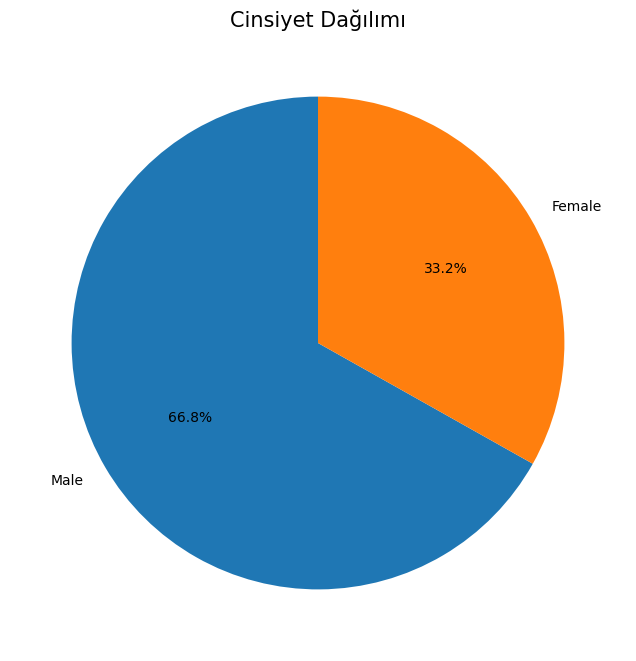

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cinsiyet kategorilerini ve sayılarını hesaplayın
gender_categories = dataset['gender'].value_counts()

# Pasta grafiği çizin
plt.figure(figsize=(8, 8))
plt.pie(gender_categories, labels=gender_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Cinsiyet Dağılımı', fontsize=15)
plt.show()



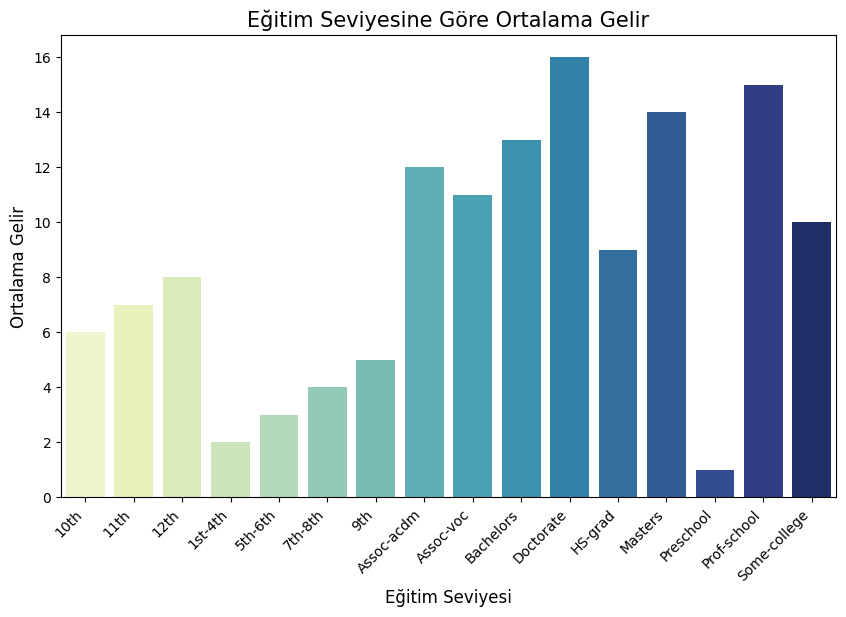

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eğitim seviyesine göre ortalama geliri hesaplayın
education_income = dataset.groupby('education')['educational-num'].mean()

# Çubuk grafiği çizin
plt.figure(figsize=(10, 6))
sns.barplot(x=education_income.index, y=education_income.values, palette='YlGnBu')
plt.title('Eğitim Seviyesine Göre Ortalama Gelir', fontsize=15)
plt.xlabel('Eğitim Seviyesi', fontsize=12)
plt.ylabel('Ortalama Gelir', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


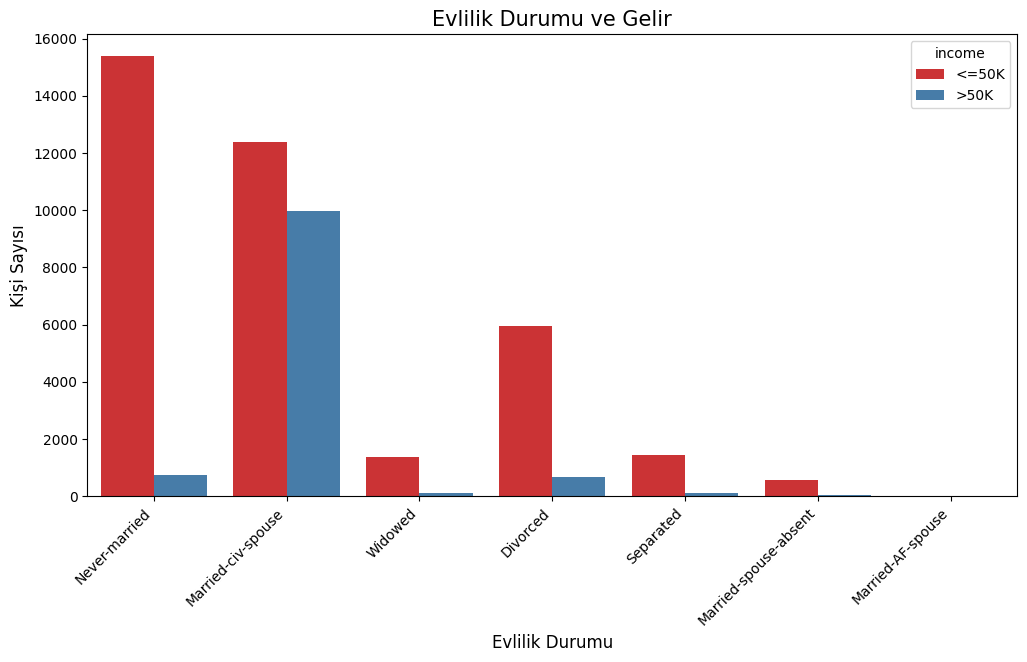

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evlilik durumuna göre geliri gösteren bir countplot çizin
plt.figure(figsize=(12, 6))
sns.countplot(x='marital-status', hue='income', data=dataset, palette='Set1')
plt.title('Evlilik Durumu ve Gelir', fontsize=15)
plt.xlabel('Evlilik Durumu', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


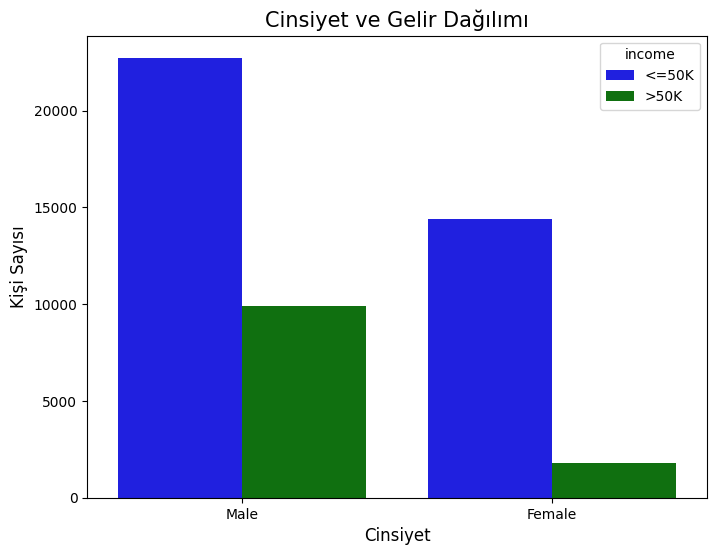

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# Cinsiyete göre gelir dağılımını gösteren bir countplot çizin ve renkleri değiştirin
plt.figure(figsize=(8, 6))
custom_palette = {'<=50K': 'blue', '>50K': 'green'}  # Özel renk paleti
sns.countplot(x='gender', hue='income', data=dataset, palette=custom_palette)
plt.title('Cinsiyet ve Gelir Dağılımı', fontsize=15)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.show()

# Veri ön işleme aşaması

In [23]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Veri Setini Bölme

In [24]:
dataset = dataset.replace('?', np.nan)

In [25]:
# Boş değerleri kontrol edin
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

## Veri Testi

In [26]:
columns_with_nan = ['workclass', 'occupation', 'native-country']

In [27]:
for col in columns_with_nan:
    if col in dataset.columns:  # Sadece mevcut sütunları ele al
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)


## Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [30]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [32]:
selector.fit(X,Y)

ExtraTreesClassifier(random_state=42)

In [33]:
feature_imp = selector.feature_importances_

In [34]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.75
1 3.88
2 17.64
3 3.78
4 8.34
5 7.27
6 7.05
7 9.01
8 1.41
9 2.96
10 8.9
11 2.89
12 9.58
13 1.54


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [38]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    76.07 %
1    23.93 %
Name: proportion, dtype: object

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [40]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [41]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [42]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

## Train Test

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [44]:
print("X_train şekli:", X_train.shape)
print("X_test şekli:", X_test.shape)
print("Y_train şekli:", Y_train.shape)
print("Y_test şekli:", Y_test.shape)

X_train şekli: (59448, 14)
X_test şekli: (14862, 14)
Y_train şekli: (59448,)
Y_test şekli: (14862,)


# Veri Modelleme

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [46]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [47]:
Y_pred_log_reg = log_reg.predict(X_test)

## KNN Sınıflandırması

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [49]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [50]:
Y_pred_knn = knn.predict(X_test)

## Decision Tree Sınıflandırması

In [51]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [52]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
Y_pred_dec_tree = dec_tree.predict(X_test)

## Random Forest Sınıflandırması

In [54]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [55]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [56]:
Y_pred_ran_for = ran_for.predict(X_test)

# Model Geliştirimi

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [58]:
print('Logistic Regression:')
print('Kesinlik değeri:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 Skoru:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Kesinlik değeri: 77.57
F1 Skoru: 77.52


In [59]:
print('KNN Sınıflandırması:')
print('Kesinlik değeri:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 Skoru:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Sınıflandırması:
Kesinlik değeri: 83.58
F1 Skoru: 84.53


In [60]:
print('Decision Tree Sınıflandırması:')
print('Kesinlik değeri:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 Skoru:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Sınıflandırması:
Kesinlik değeri: 92.29
F1 Skoru: 92.65


In [61]:
print('Random Forest Sınıflandırması:')
print('Kesinlik değeri:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 Skoru:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Sınıflandırması:
Kesinlik değeri: 93.78
F1 Skoru: 94.03


## Hiperparametre ayarı ve Görselleştirme

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini tanımla ve n_estimators ayarını değiştir
ran_for = RandomForestClassifier(n_estimators=100, random_state=42)
ran_for.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [64]:
# max_depth hiperparametresini ayarlayın
ran_for = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
ran_for.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [65]:
# min_samples_split ve min_samples_leaf ayarlarını değiştirin
ran_for = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=42)
ran_for.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

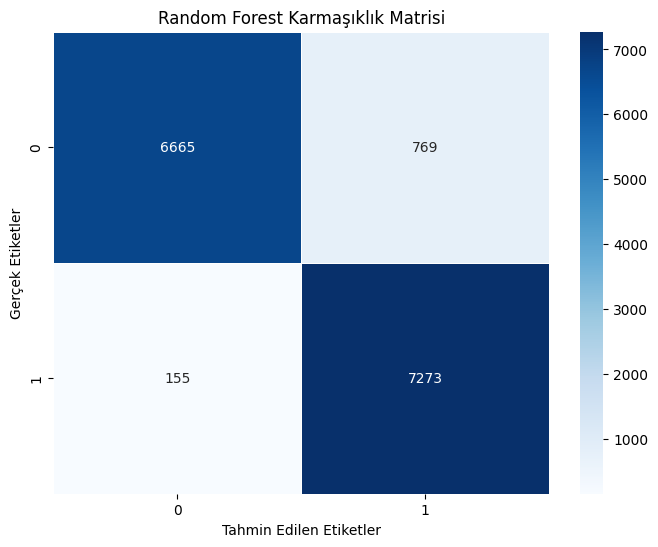

In [62]:
cm_ran_for = confusion_matrix(Y_test, Y_pred_ran_for)

# Isı haritası ile karmaşıklık matrisini görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ran_for, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Random Forest Karmaşıklık Matrisi')
plt.show()